<a href="https://www.kaggle.com/code/sindhurank/eda-on-aerofit-treadmill-buyer-profile?scriptVersionId=157523425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA on AeroFit Treadmill Buyer
## About this Dataset
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset features their Age, Gender, Education, Marital-Status, Income and other attributes.

### Product Portfolio:

    1. The KP281 is an entry-level treadmill that sells for $1,500.
    2. The KP481 is for mid-level runners that sell for $1,750.
    3. The KP781 treadmill is having advanced features that sell for $2,500.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('/kaggle/input/aerofit-treadmill')

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
td=pd.read_csv('aerofit_treadmill.csv')
td.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
td.shape

(180, 9)

In [6]:
td.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
td.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


### Overall Customer Profile: 
    1. Customers age between 18 and 50
    2. Education between 12 years - 21 years
    3. Usage between 2-7 times a week
    4. Fitness rating of customers lie between 1-5
    5. Customers income range from 29k - 104k
    6. Miles covered range from 21-360 each week
    7. Majorty Male customers
    8. KP281 is highly sold product
    9. Majorty customers are Partnered

In [8]:
td.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Missing values/Duplicate values

In [9]:
td.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [10]:
td.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
td.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
td.duplicated().sum()

0

## There are no missing values/null values or duplicated values in the dataset

# Descriptive Analysis

### categorical,continuous features

In [13]:
td.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [14]:
cat=list(td.columns[td.dtypes=='object'])
cat

['Product', 'Gender', 'MaritalStatus']

In [15]:
con=list(td.columns[td.dtypes!='object'])
con

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [16]:
td[cat].describe().T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [17]:
td[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


## Separate data based on company's product 
    1. p1 belongs to KP281
    2. p2 belongs to KP481
    3. p3 belongs to KP881

In [18]:
p1=td.query("Product=='KP281'")
p1.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [19]:
p2=td.query("Product=='KP481'")
p2.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53


In [20]:
p3=td.query("Product=='KP781'")
p3.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120


# Data Visualisation
# Product KP281

## Univariate Analysis
    Univariate analysis explores each variable separately
    it describes each vairable on its own
    it looks at the range of values and central tendency of values
    it describes the pattern of response to the variable

Text(0.5, 1.0, 'Countplot of MaritalStatus')

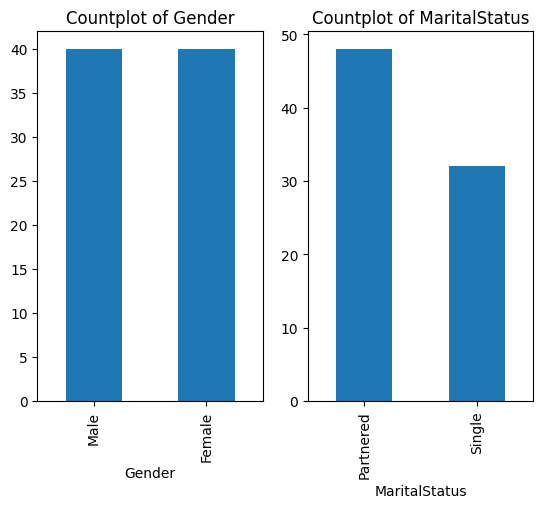

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2)
p1['Gender'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Countplot of Gender')
p1['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title('Countplot of MaritalStatus')

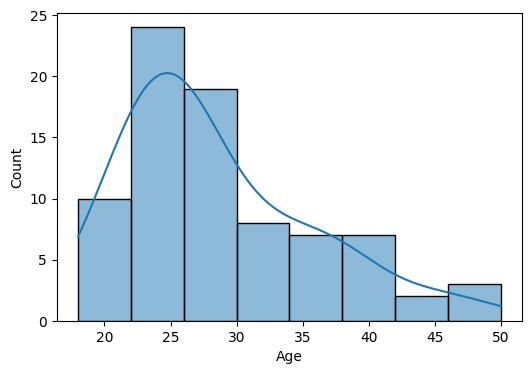

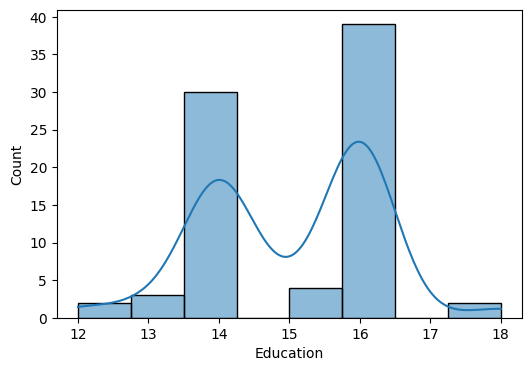

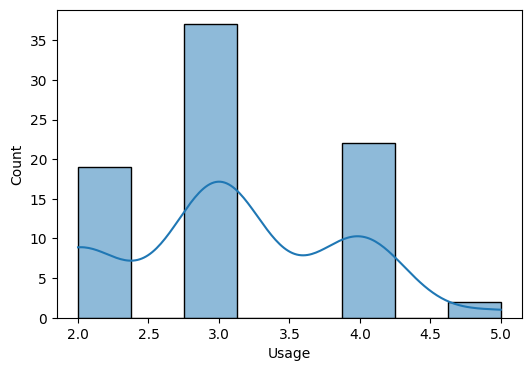

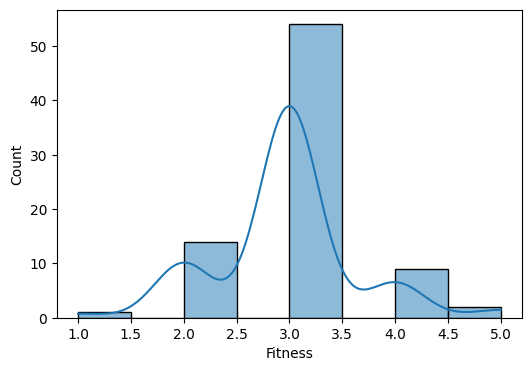

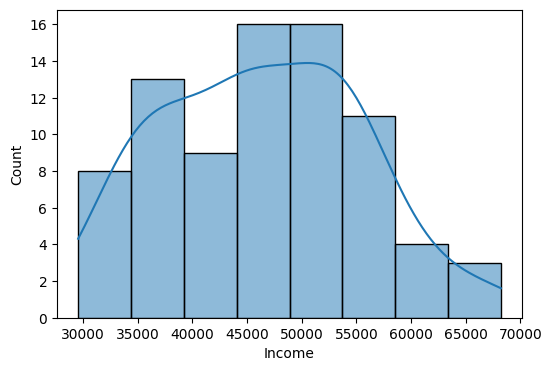

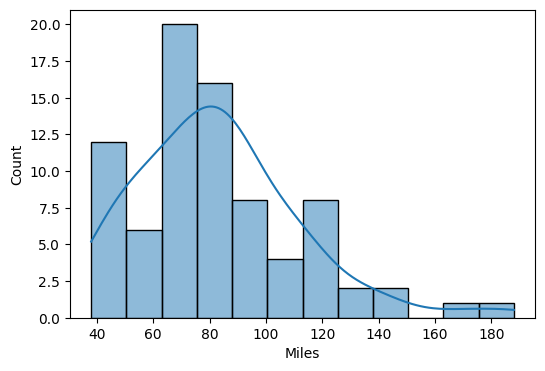

In [22]:
for i in con:
    plt.figure(figsize=(6,4))
    sns.histplot(data=p1,x=i,kde=True)
    plt.show()

## Graphical Analysis for KP281:
    1. Partnered segment are purchasing this product more
    2. Most of the sales are from 22-30yrs age group 
    3. Education of customers is around 14yrs and 16yrs
    4. Maximum Usage is around 3times a week
    5. Maximum fitness rating is 3-3.5
    6. Maximum Customer Income range from 34k-53k
    7. Maximum miles covered 60-85

## Bivariate Analysis
    1. it is to observe the relationships between 2 variables
    
    scatter plot and correlation heatmap : continuous variables vs continuous variables
    boxplot : categorical variables vs continuous variables
    crosstab : categorical variables vs categorical variables

<Axes: >

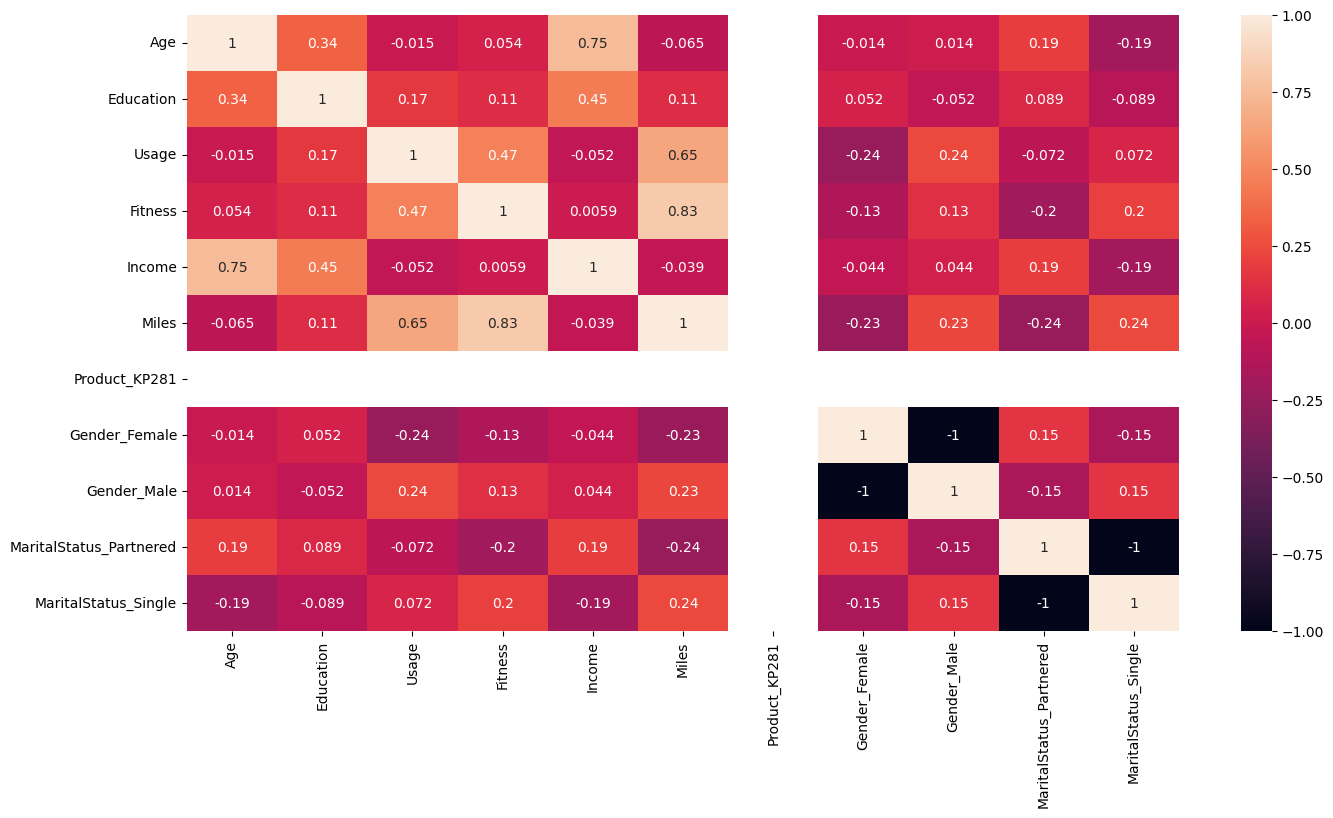

In [23]:
# one hot encoding to convert catergorical values to continuous values
p1gd=pd.get_dummies(p1)
plt.figure(figsize=(16,8))
sns.heatmap(p1gd.corr(),annot=True)

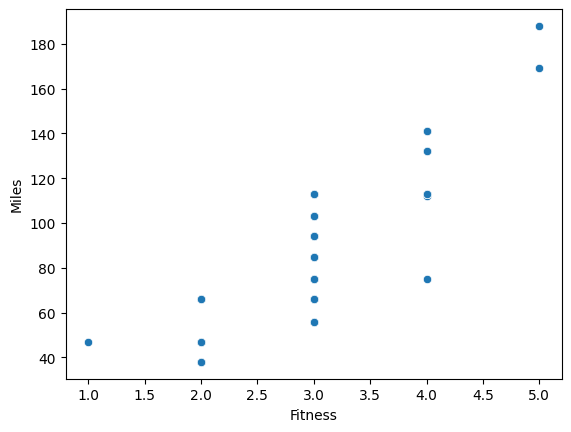

In [24]:
sns.scatterplot(p1,x='Fitness',y='Miles')
plt.show()

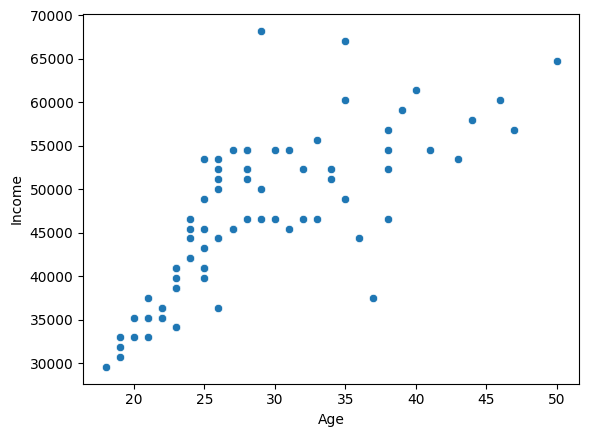

In [25]:
sns.scatterplot(p1,x='Age',y='Income')
plt.show()

Text(0.5, 1.0, 'KP281 product vs Age')

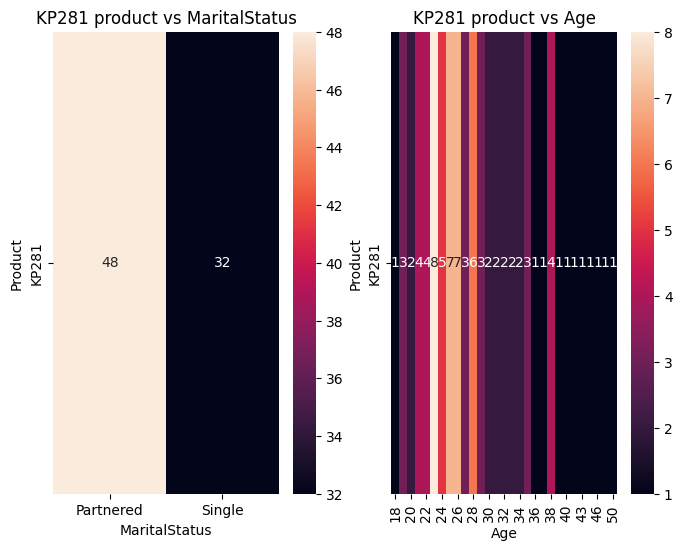

In [26]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))

ctab1=pd.crosstab(p1['Product'],p1['MaritalStatus'])
sns.heatmap(ctab1,annot=True,ax=ax[0])
ax[0].set_title('KP281 product vs MaritalStatus')

ctab2=pd.crosstab(p1['Product'],p1['Age'])
sns.heatmap(ctab2,annot=True,ax=ax[1])
ax[1].set_title('KP281 product vs Age')

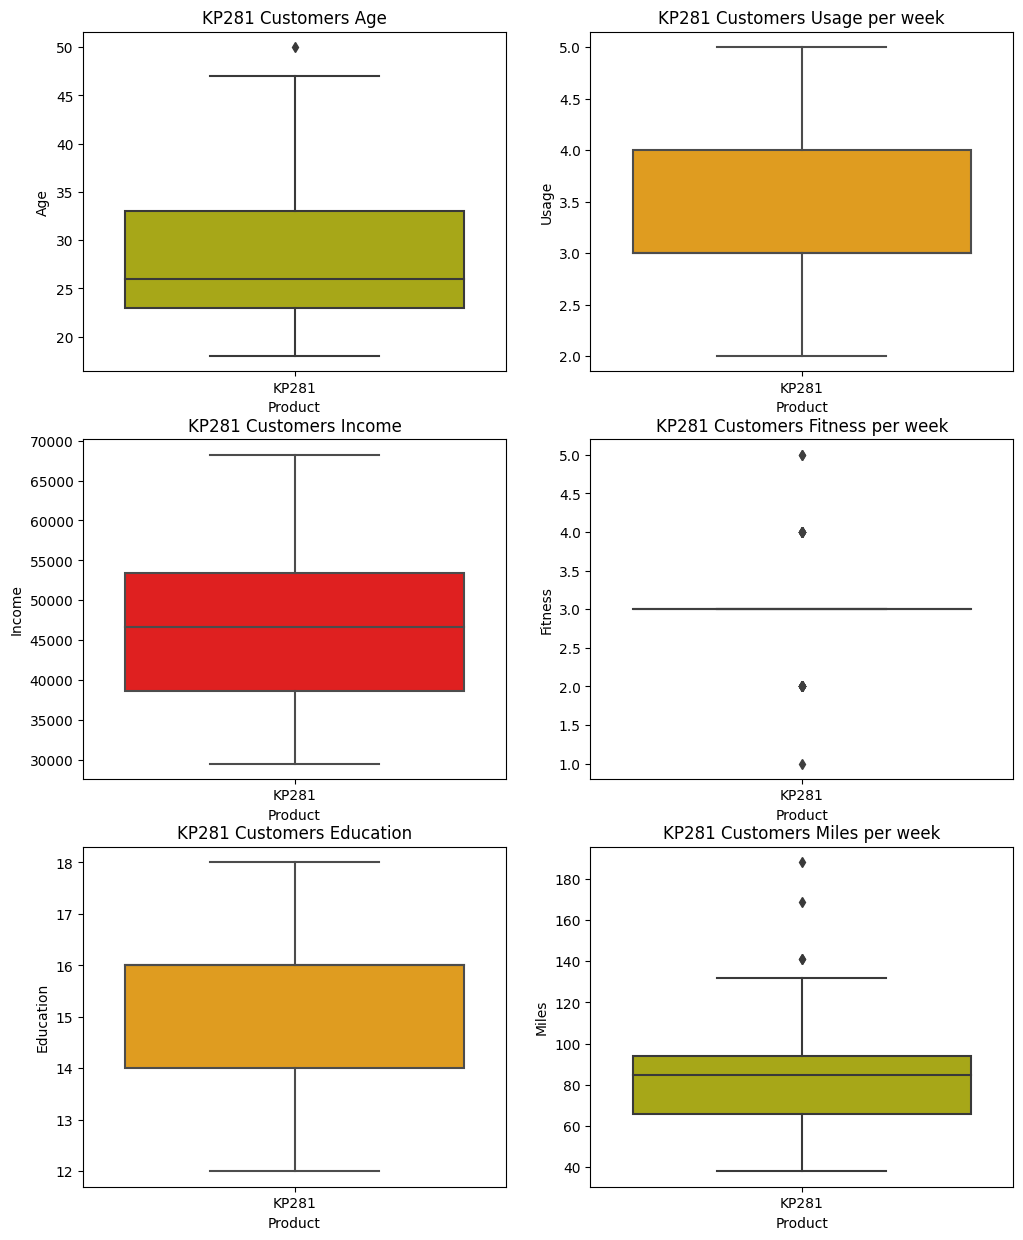

In [27]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))


sns.boxplot(p1,x='Product',y='Age',ax=ax[0,0],color='y')
ax[0,0].set_title("KP281 Customers Age")

sns.boxplot(p1,x='Product',y='Usage',ax=ax[0,1],color='orange')
ax[0,1].set_title("KP281 Customers Usage per week")

sns.boxplot(p1,x='Product',y='Income',ax=ax[1,0],color='r')
ax[1,0].set_title("KP281 Customers Income")

sns.boxplot(p1,x='Product',y='Fitness',ax=ax[1,1])
ax[1,1].set_title("KP281 Customers Fitness per week")

sns.boxplot(p1,x='Product',y='Education',ax=ax[2,0],color='orange')
ax[2,0].set_title("KP281 Customers Education")

sns.boxplot(p1,x='Product',y='Miles',ax=ax[2,1],color='y')
ax[2,1].set_title("KP281 Customers Miles per week")
plt.show()

# Product KP481

## Univariate anlaysis

Text(0.5, 1.0, 'Countplot of MaritalStatus')

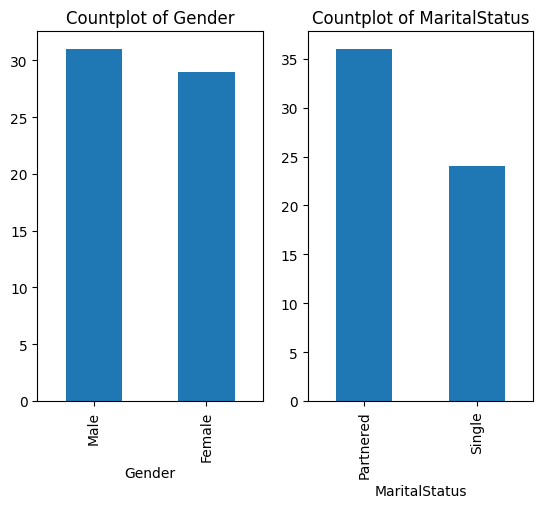

In [28]:
fig,ax=plt.subplots(nrows=1,ncols=2)
p2['Gender'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Countplot of Gender')
p2['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title('Countplot of MaritalStatus')

In [29]:
# Slight difference in Male and Female. Partnered customers are more than single customers

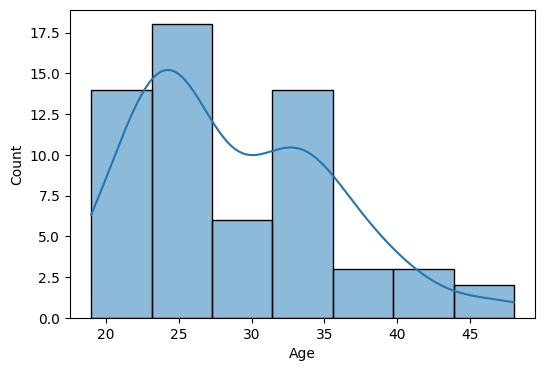

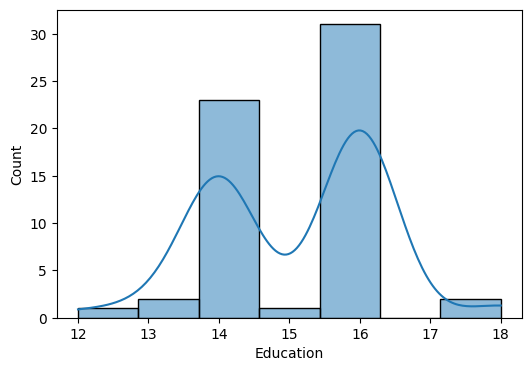

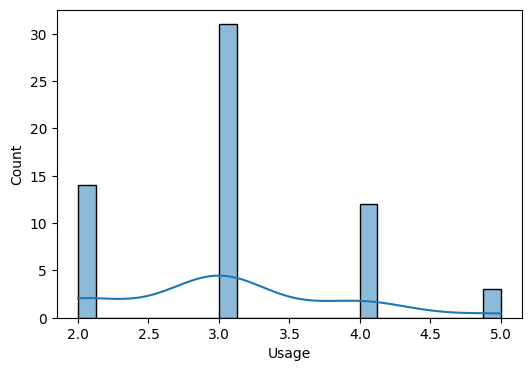

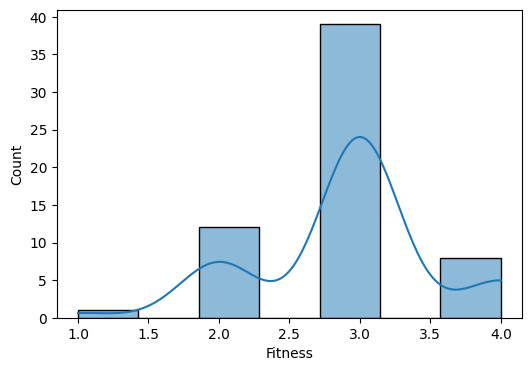

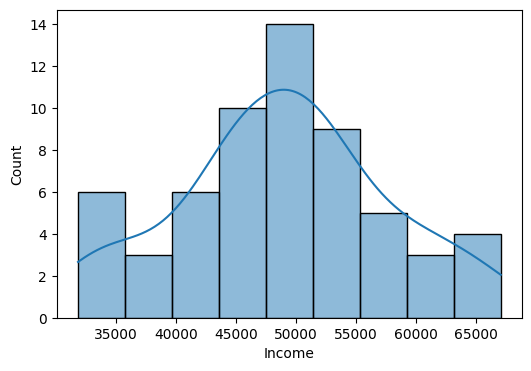

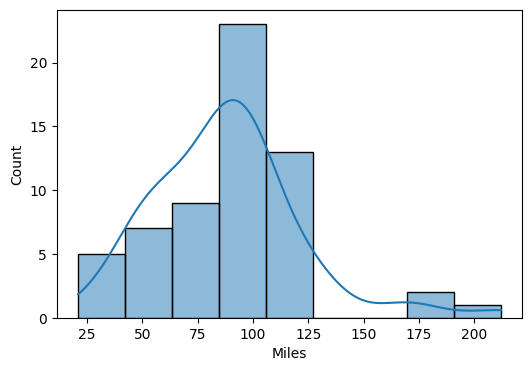

In [30]:
for i in con:
    plt.figure(figsize=(6,4))
    sns.histplot(data=p2,x=i,kde=True)
    plt.show()

### Analysis: 
    Customers with age group 19-27 and 32-35yrs
    Education of 14yrs and 16yrs
    Usage of 3
    Fitness 3/5
    Income range of 44-55k
    Miles target 85-105

## Bivariate Analysis
    scatter plot and heatmap: con vs con
    cross tab: cat vs cat
    boxplot: cat vs con

<Axes: >

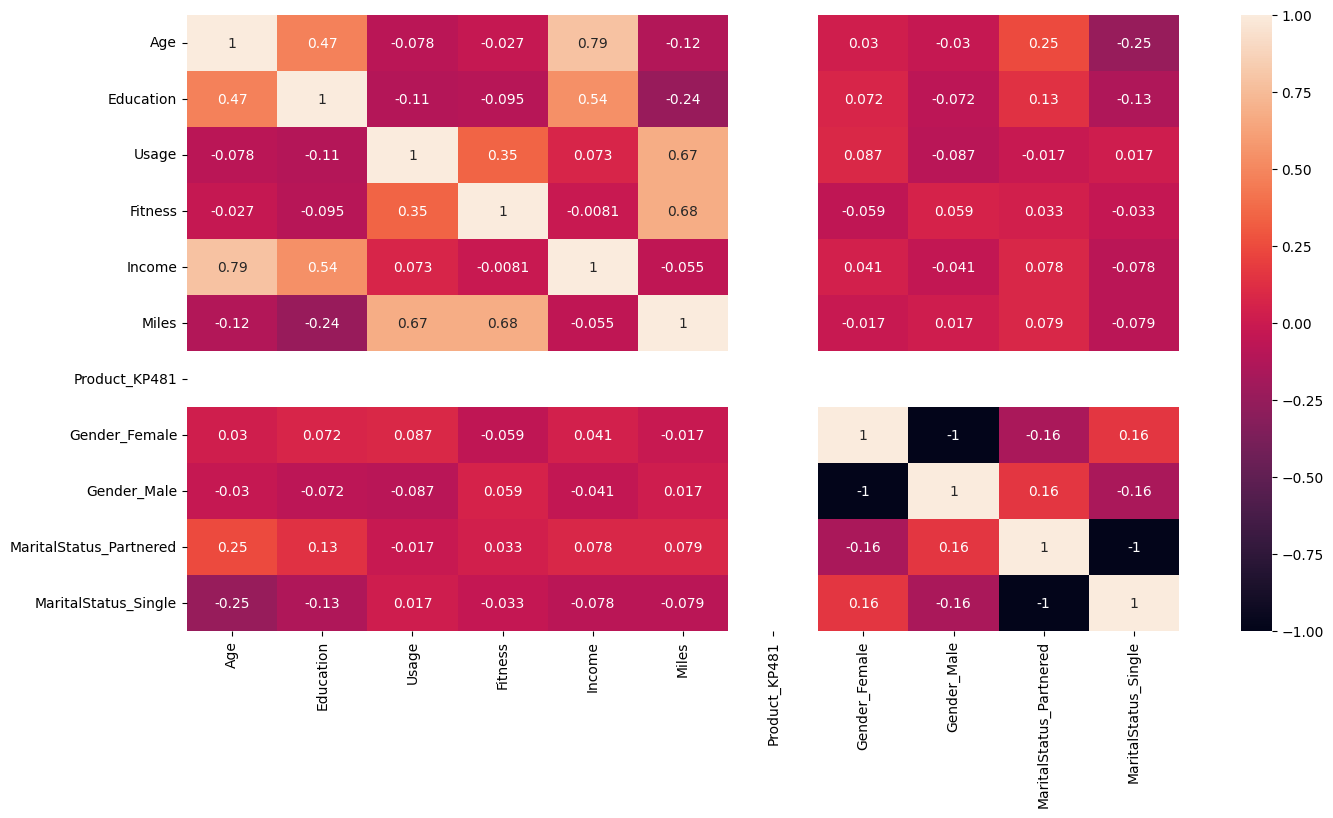

In [31]:
# one hot encoding to convert catergorical values to continuous values
p2gd=pd.get_dummies(p2)
plt.figure(figsize=(16,8))
sns.heatmap(p2gd.corr(),annot=True)

<Axes: xlabel='Age', ylabel='Income'>

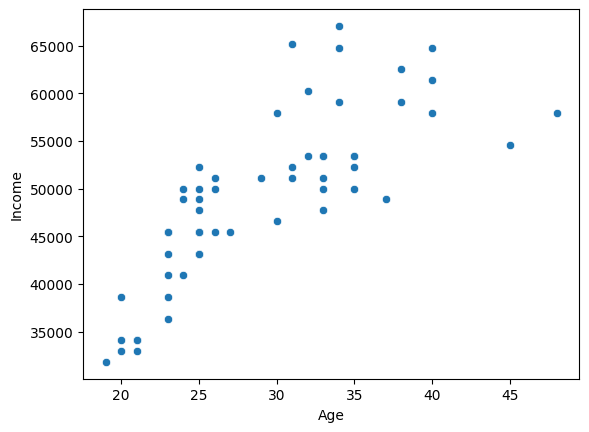

In [32]:
sns.scatterplot(p2,x='Age',y='Income')

Text(0.5, 1.0, 'KP481 product vs Age')

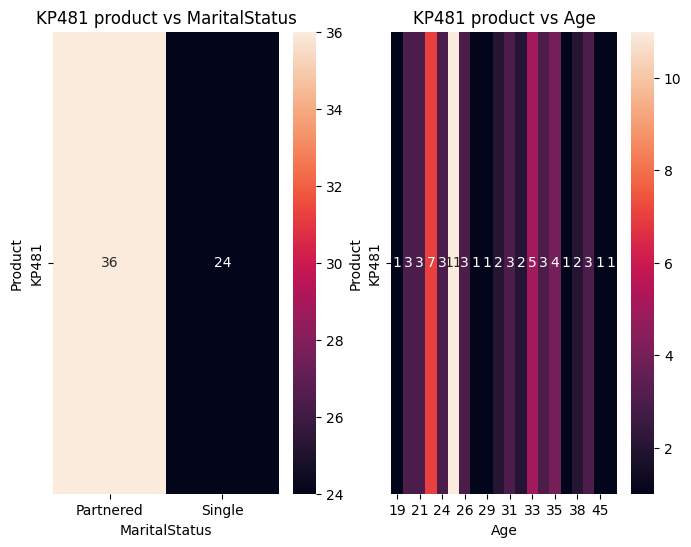

In [33]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))

ctab1=pd.crosstab(p2['Product'],p2['MaritalStatus'])
sns.heatmap(ctab1,annot=True,ax=ax[0])
ax[0].set_title('KP481 product vs MaritalStatus')

ctab2=pd.crosstab(p2['Product'],p2['Age'])
sns.heatmap(ctab2,annot=True,ax=ax[1])
ax[1].set_title('KP481 product vs Age')

In [34]:
# Maximum customers belong to 23 and 25yrs 
# Partnered are more than single

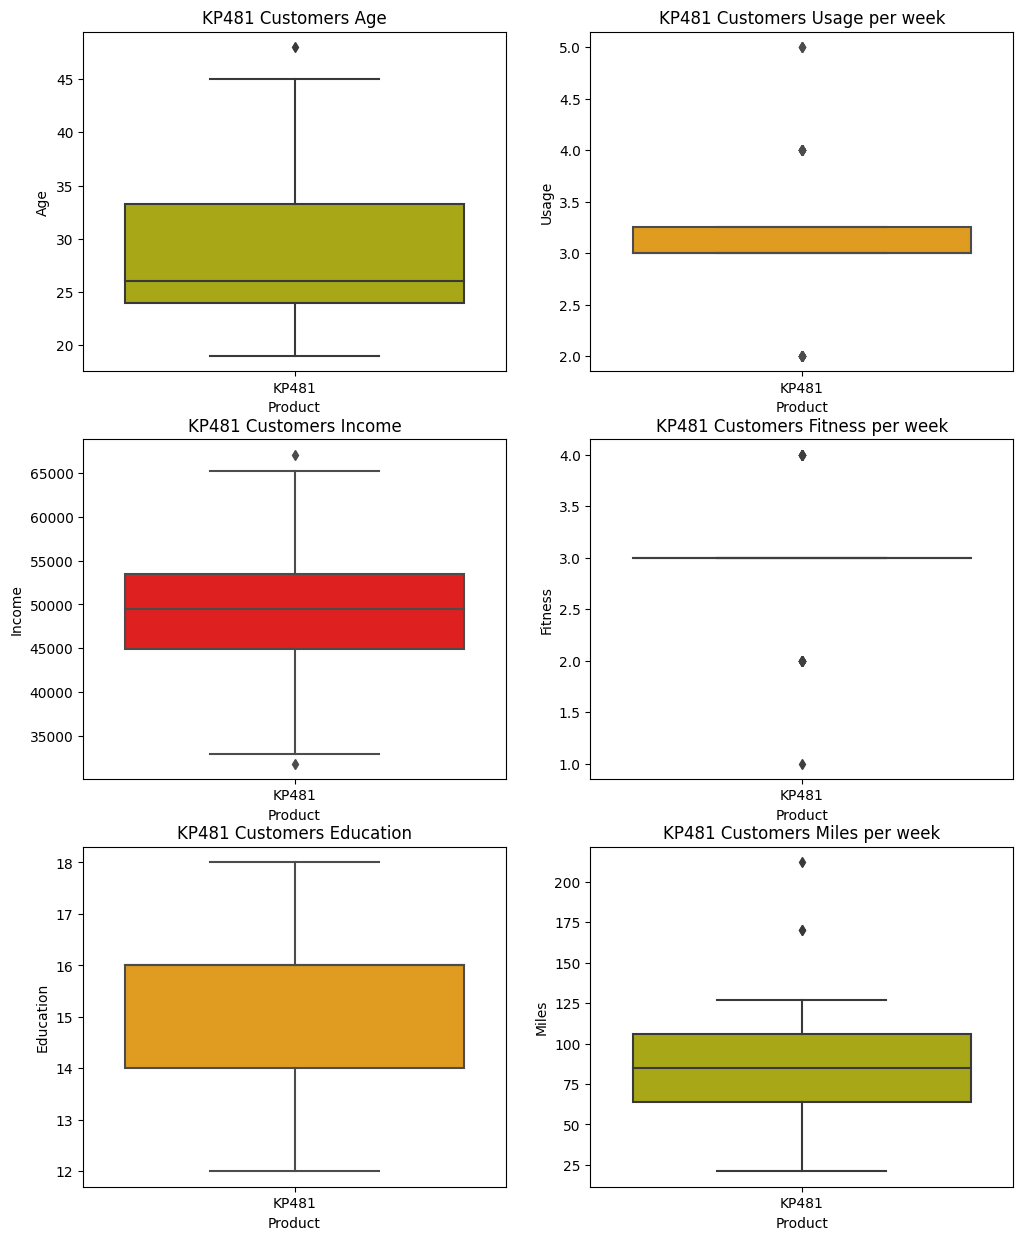

In [35]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))


sns.boxplot(p2,x='Product',y='Age',ax=ax[0,0],color='y')
ax[0,0].set_title("KP481 Customers Age")

sns.boxplot(p2,x='Product',y='Usage',ax=ax[0,1],color='orange')
ax[0,1].set_title("KP481 Customers Usage per week")

sns.boxplot(p2,x='Product',y='Income',ax=ax[1,0],color='r')
ax[1,0].set_title("KP481 Customers Income")

sns.boxplot(p2,x='Product',y='Fitness',ax=ax[1,1])
ax[1,1].set_title("KP481 Customers Fitness per week")

sns.boxplot(p2,x='Product',y='Education',ax=ax[2,0],color='orange')
ax[2,0].set_title("KP481 Customers Education")

sns.boxplot(p2,x='Product',y='Miles',ax=ax[2,1],color='y')
ax[2,1].set_title("KP481 Customers Miles per week")
plt.show()

# Product KP781

## Univariate Analysis

Text(0.5, 1.0, 'Countplot of MaritalStatus')

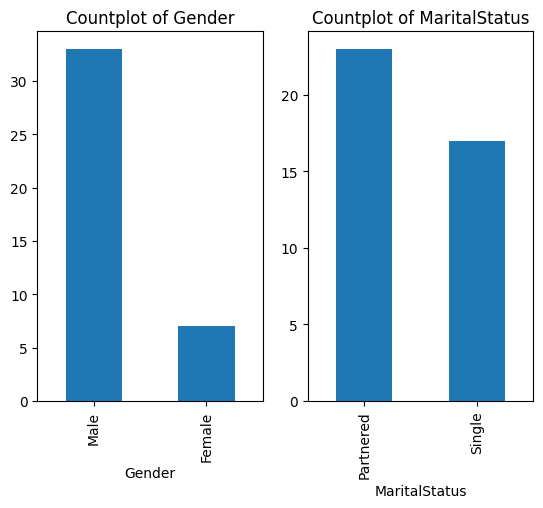

In [36]:
fig,ax=plt.subplots(nrows=1,ncols=2)
p3['Gender'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Countplot of Gender')
p3['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title('Countplot of MaritalStatus')

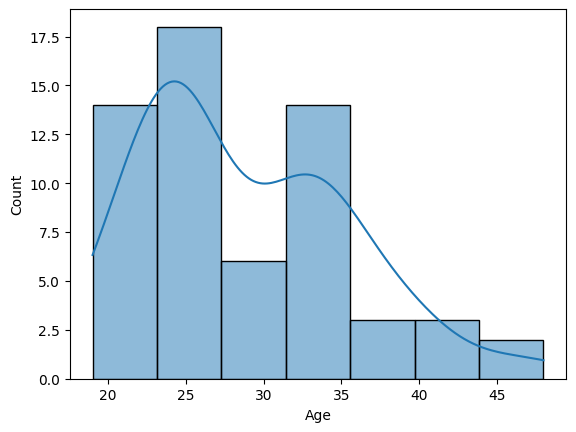

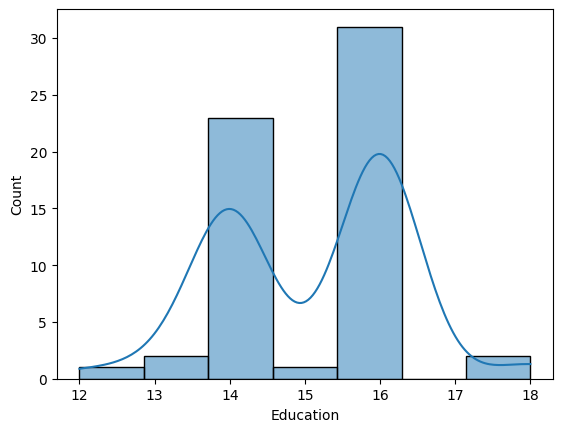

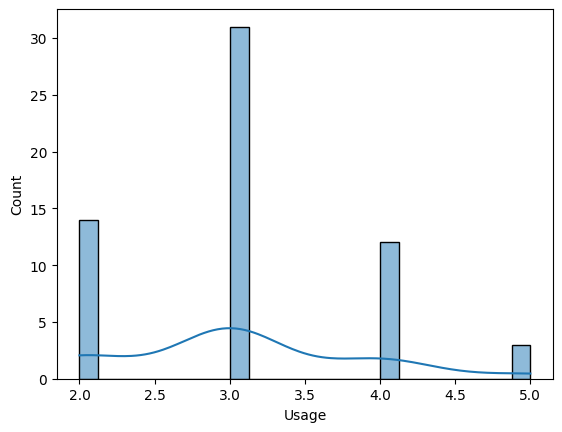

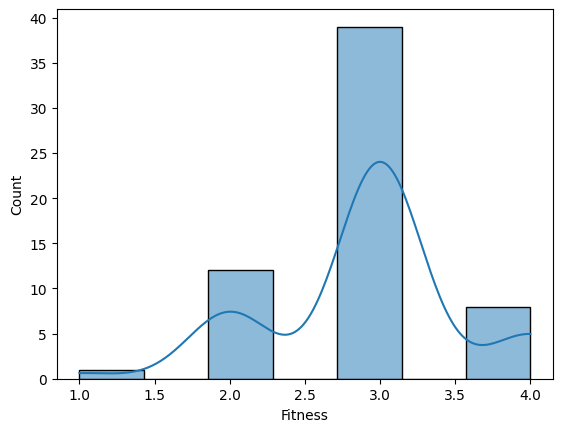

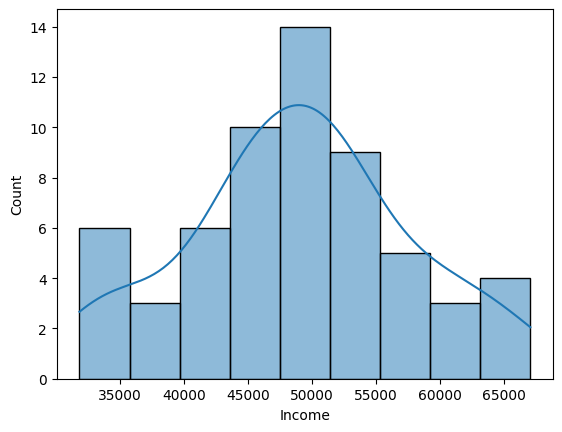

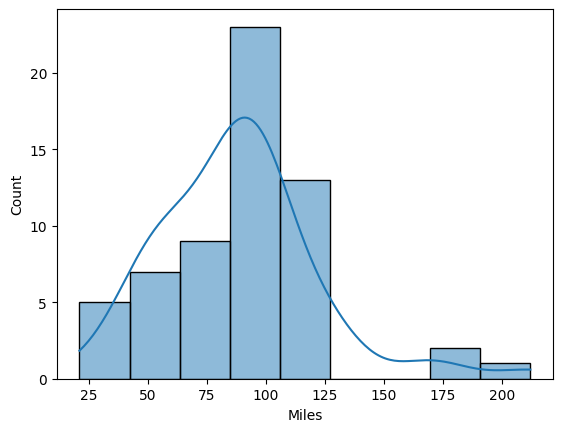

In [37]:
for i in con:
    sns.histplot(data=p2,x=i,kde=True)
    plt.show()

## Analysis:
    partnered customers are more than single
    maximum customers are male
    age group 22-31yrs
    education 16-17 and 18-19yrs
    usage is 4 or 5times a week
    Fitness rating 4.75-5
    income range 50k or 95k
    miles 1160-200miles

## Bivariate Analysis
    scatter plot and heat map : con vs con
    box plot : cat vs con
    crossstab : cat vs cat

<Axes: >

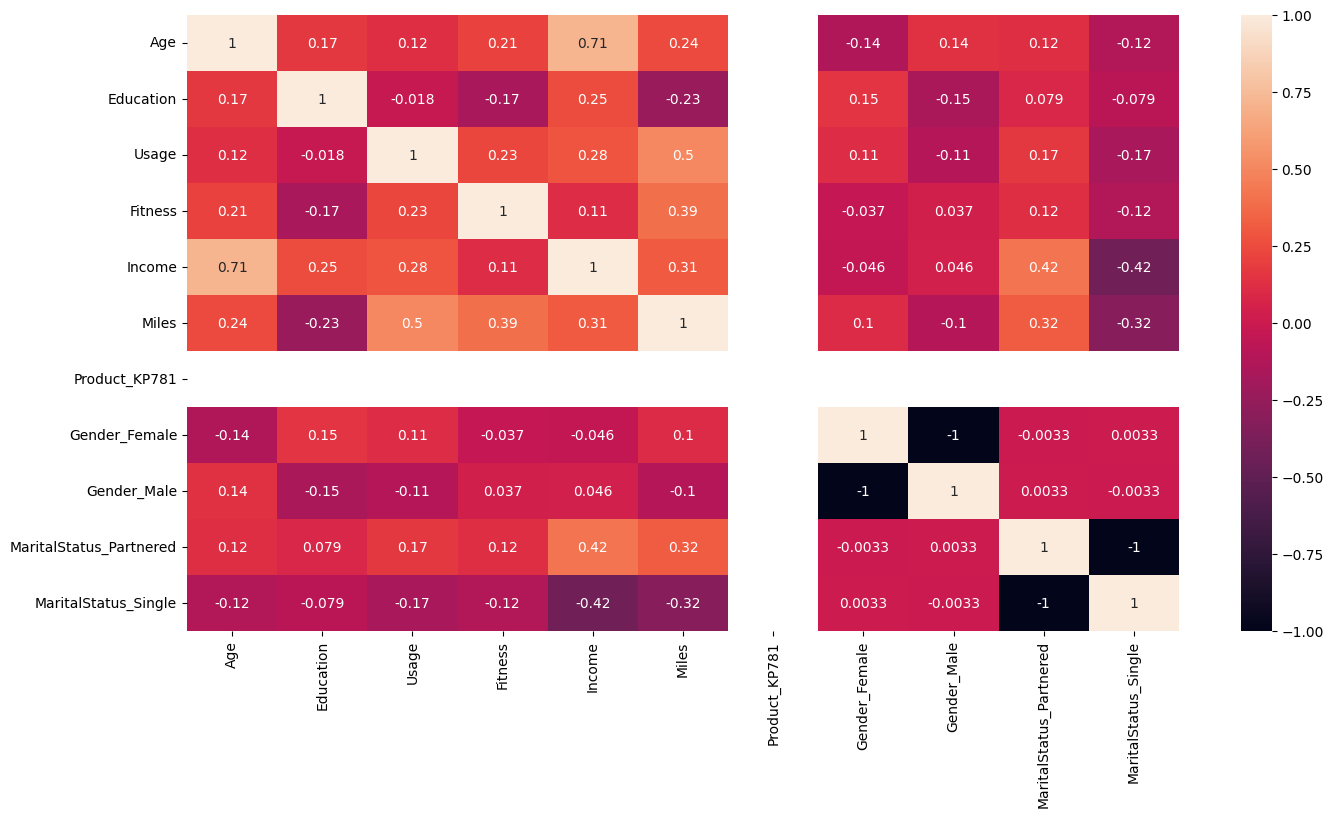

In [38]:
# one hot encoding to convert catergorical values to continuous values
p3gd=pd.get_dummies(p3)
plt.figure(figsize=(16,8))
sns.heatmap(p3gd.corr(),annot=True)

<Axes: xlabel='Income', ylabel='Age'>

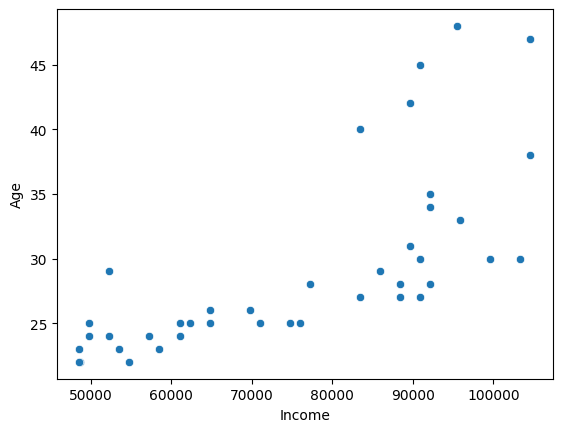

In [39]:
sns.scatterplot(p3,x='Income',y='Age')

In [40]:
# Income and Age are correlated

Text(0.5, 1.0, 'KP781 product vs Age')

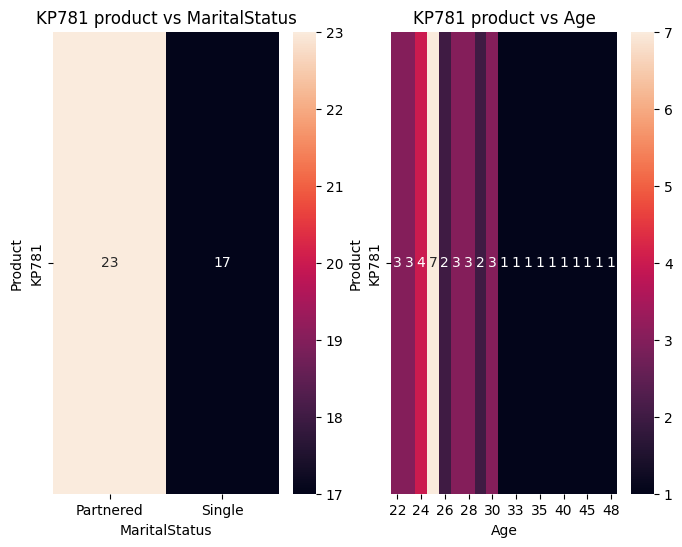

In [41]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))

ctab1=pd.crosstab(p3['Product'],p3['MaritalStatus'])
sns.heatmap(ctab1,annot=True,ax=ax[0])
ax[0].set_title('KP781 product vs MaritalStatus')

ctab2=pd.crosstab(p3['Product'],p3['Age'])
sns.heatmap(ctab2,annot=True,ax=ax[1])
ax[1].set_title('KP781 product vs Age')

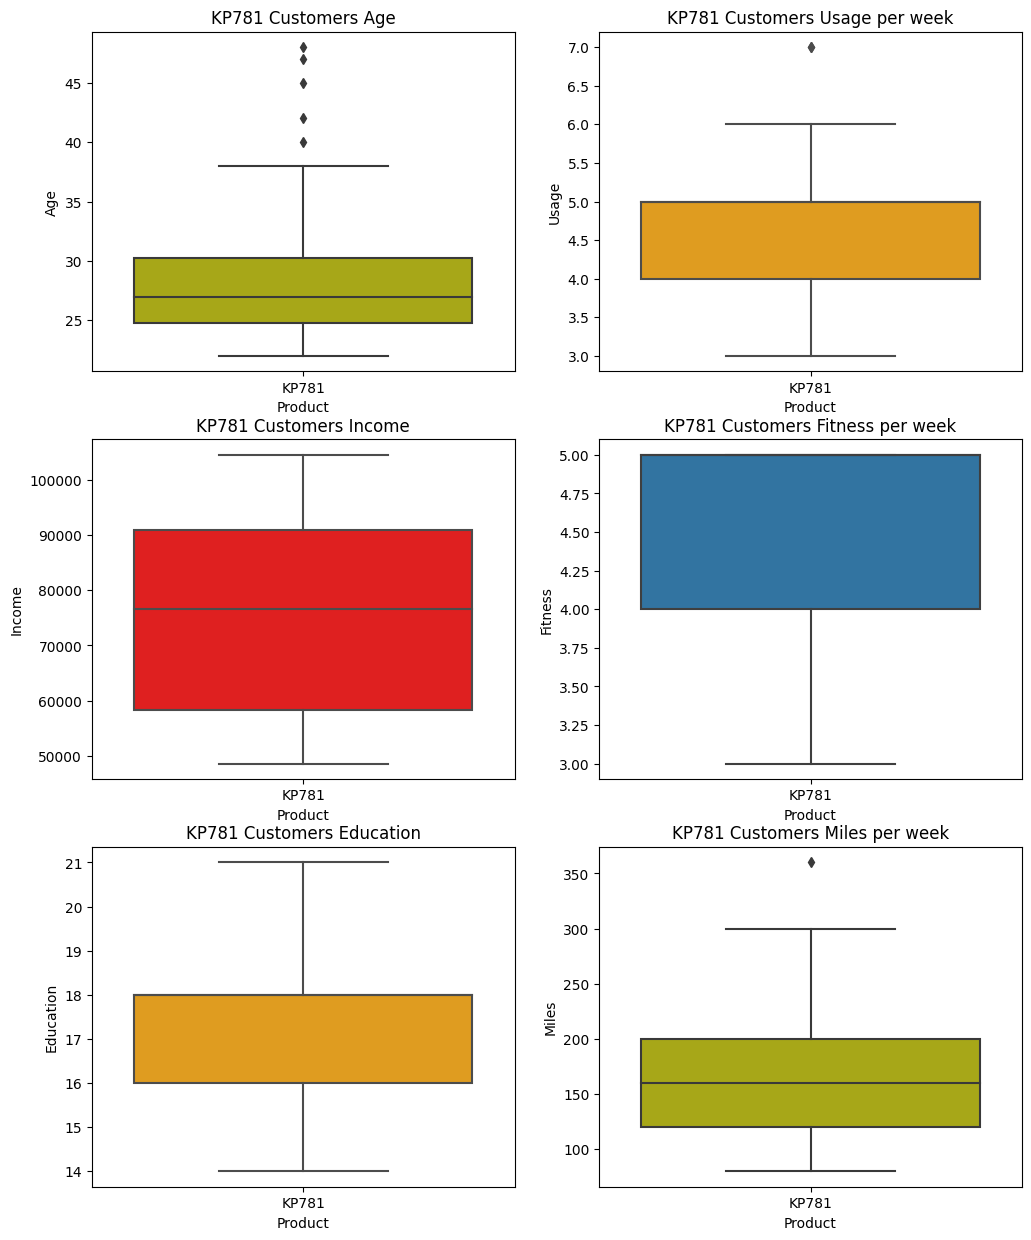

In [42]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))


sns.boxplot(p3,x='Product',y='Age',ax=ax[0,0],color='y')
ax[0,0].set_title("KP781 Customers Age")

sns.boxplot(p3,x='Product',y='Usage',ax=ax[0,1],color='orange')
ax[0,1].set_title("KP781 Customers Usage per week")

sns.boxplot(p3,x='Product',y='Income',ax=ax[1,0],color='r')
ax[1,0].set_title("KP781 Customers Income")

sns.boxplot(p3,x='Product',y='Fitness',ax=ax[1,1])
ax[1,1].set_title("KP781 Customers Fitness per week")

sns.boxplot(p3,x='Product',y='Education',ax=ax[2,0],color='orange')
ax[2,0].set_title("KP781 Customers Education")

sns.boxplot(p3,x='Product',y='Miles',ax=ax[2,1],color='y')
ax[2,1].set_title("KP781 Customers Miles per week")
plt.show()

# ===========================================================

Text(0.5, 1.0, 'Customers Education for different Product')

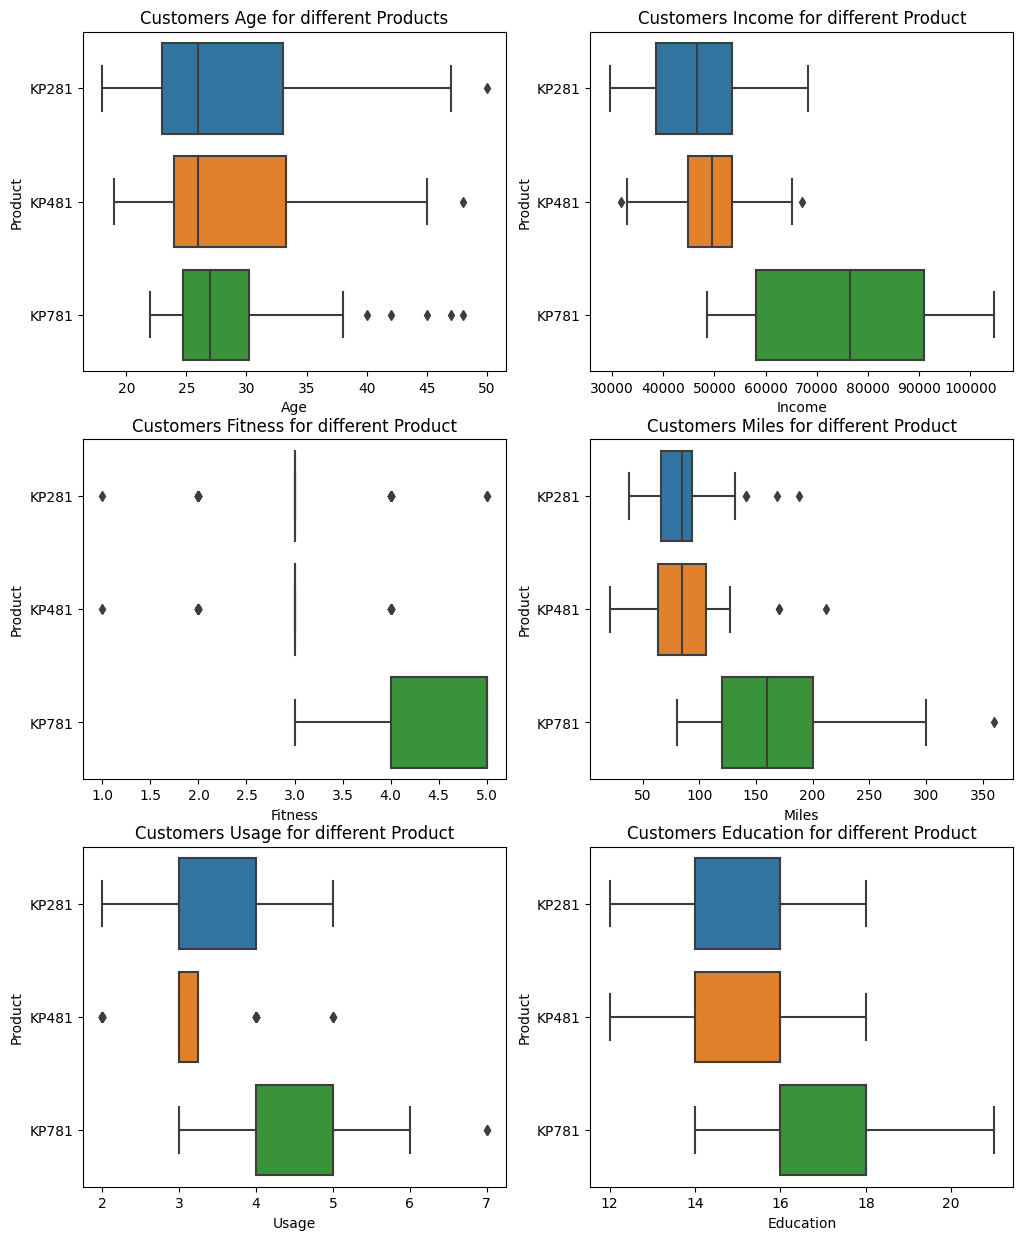

In [43]:
## Product vs Age
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
sns.boxplot(data=td, x='Age', y='Product', ax=ax[0,0]); ax[0,0].set_title('Customers Age for different Products')
sns.boxplot(data=td, x='Income', y='Product', ax=ax[0,1]); ax[0,1].set_title('Customers Income for different Product')
sns.boxplot(data=td, x='Fitness', y='Product', ax=ax[1,0]); ax[1,0].set_title('Customers Fitness for different Product')
sns.boxplot(data=td, x='Miles', y='Product', ax=ax[1,1]); ax[1,1].set_title('Customers Miles for different Product')
sns.boxplot(data=td, x='Usage', y='Product', ax=ax[2,0]); ax[2,0].set_title('Customers Usage for different Product')
sns.boxplot(data=td, x='Education', y='Product', ax=ax[2,1]); ax[2,1].set_title('Customers Education for different Product')

# Individual Product Analysis:
### KP281: This is the highest sold product.Below customers are our target customers:
        1. Low income people aged(38k-55k) between 23-34yrs with education around 14,16yrs.
        2. People with fitness levels 3/5 and who target 65-95 avg miles per week.
        3. Married couple tend to purchase this product more than single.
    
### KP481: This is the 2nd highest sold product. Below customers are our target customers:
        1. Moderate income people aged(45k-55k) between 24-34yrs with education around 14,16yrs.
        2. People with fitness levels 3/5 and who target 60-110 avg miles per week.
        3. Married couple tend to purchase this product more than single.

### KP781: This is the lowest sold product. Below customers are our target customers:
        1. High income people(range 58k-90k) aged between 25-28yrs with education around 16,18yrs.
        2. People with fitness levels 4/5 and who target 120-200 avg miles per week.
        3. Married couple tend to purchase this product more than single.

# Overall Product Analysis: Among all the 3 products, 
## KP281 is the highest sold product and KP481 is second highest sold product.
## KP781 is premium product. We can look for below features for target customers
    1. Many people are preferring KP281 over KP481 due to economical reasons.
    2. The target fitness goals and age group is similar for KP281,KP481 products.
    3. KP781 is mostly bought by high salaried people with good fitness levels.
    
### Irrespective of product type,below features can be observed in target customers:
    1. Rate of purchase by Married people is more than single people.
    2. People target to workout atleast 3 times a week 
    3. The more the age, the higher the income, so we need to target higher age group.
    4. People with higher education tend  to earn more and spend on premium products